<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part_2_Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [143]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [144]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [145]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [146]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [147]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [148]:
beta_list = []
for i in range(1000):
  beta_list.append(beta[i])  
Beta = pd.DataFrame(beta_list)    

In [149]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [150]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 1 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 items and each item itself list of 1 values 
    and S_next_list, I_next_list, R_next_list are list of S, I, R respectively for (day +1) value for each of 1 days for each of 1000 rows   """
S_list = []
S_next_list = []
I_list = []
I_next_list = []
R_list = []
R_next_list = []
for i in range(1000):
  p = sample(range(0, 99), 1)
  S_list.append(S_value[p].iloc[i].to_list())
  S_next_list.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_next_list.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_next_list.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [151]:
""" merging 1000 lists each of 1 items into a single list of 1000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susnext_list = []
for i in range(1000):
 susnext_list = susnext_list+S_next_list[i]

infectednext_list = []
for i in range(1000):
 infectednext_list = infectednext_list+I_next_list[i]  

recovnext_list = []
for i in range(1000):
 recovnext_list = recovnext_list+R_next_list[i]


In [152]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susnext_list)
df_5 = pd.DataFrame(infectednext_list)
df_6 = pd.DataFrame(recovnext_list)


In [153]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta], axis=1)
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6
0,202.847363,2.143270e-03,797.150494,202.846912,1.482511e-03,797.151606,1.240425
1,243.691245,5.088239e+01,705.426365,237.604985,4.432241e+01,718.072600,0.532027
2,202.845900,1.064814e-06,797.154099,202.845900,7.059744e-07,797.154099,1.382345
3,237.440016,4.414011e+01,718.419871,230.701809,3.648381e+01,732.814381,0.716026
4,202.855276,1.373475e-02,797.130990,202.851885,8.768538e-03,797.139346,1.510228
...,...,...,...,...,...,...,...
995,984.505665,8.186772e+00,7.307563,968.264647,1.611069e+01,15.624666,1.418401
996,946.549894,2.648456e+01,26.965548,936.940264,3.099211e+01,32.067626,0.355701
997,202.849934,5.909771e-03,797.144156,202.849211,4.850855e-03,797.145938,0.664485
998,675.448955,1.288624e+02,195.688596,534.417199,1.527938e+02,312.788986,1.635135


In [154]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [155]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6
0,1.837668e-06,1.392400e-05,0.999995,1.271130e-06,9.631283e-06,0.999997,0.620390
1,5.130332e-02,3.305633e-01,0.884931,4.365901e-02,2.879450e-01,0.900795,0.265937
2,9.135507e-10,6.920781e-09,1.000000,6.058303e-10,4.589527e-09,1.000000,0.691401
3,4.345153e-02,2.867613e-01,0.901231,3.498830e-02,2.370207e-01,0.919288,0.358002
4,1.177674e-05,8.922938e-05,0.999971,7.518445e-06,5.696569e-05,0.999981,0.755389
...,...,...,...,...,...,...,...
995,9.817946e-01,5.318630e-02,0.009167,9.614011e-01,1.046647e-01,0.019598,0.709443
996,9.341207e-01,1.720600e-01,0.033827,9.220562e-01,2.013434e-01,0.040225,0.177710
997,5.067168e-06,3.839351e-05,0.999988,4.159243e-06,3.151407e-05,0.999990,0.332213
998,5.936075e-01,8.371696e-01,0.245484,4.164688e-01,9.926404e-01,0.392380,0.817887


In [156]:
X = data_scaled[[0,1,2,3,4,5]]
y = data_scaled[6]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [158]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [159]:
from sklearn.metrics import mean_absolute_error

In [160]:
#default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [161]:
#added evaluation matrix to param dictionary
params['eval_metric'] = "mae"

num_boost_round = 999


In [162]:
#gridsearch
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
#Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.11083720000000001 for 166 rounds
CV with max_depth=9, min_child_weight=6
[06:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squar

In [163]:
params['max_depth'] = 10
params['min_child_weight'] = 5

In [164]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.10919999999999999 for 187 rounds
CV with subsample=1.0, colsample=0.9
[06:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederro

In [165]:
params['subsample'] = .7
params['colsample_bytree'] = .9

In [ ]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
CV with eta=0.3
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 3.06 s, sys: 47.9 ms, total: 3.11 s
Wall time: 1.59 s
	MAE 0.1066426 for 130 rounds

CV with eta=0.2
[06:12:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:49] WARNING: /workspace/src/object

In [166]:
params['eta'] = .1

In [167]:
#training model using tuned parameters
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[07:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.231664
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.221814
[2]	Test-mae:0.213373
[3]	Test-mae:0.206177
[4]	Test-mae:0.198753
[5]	Test-mae:0.191653
[6]	Test-mae:0.184994
[7]	Test-mae:0.178783
[8]	Test-mae:0.173599
[9]	Test-mae:0.16889
[10]	Test-mae:0.165434
[11]	Test-mae:0.161908
[12]	Test-mae:0.15905
[13]	Test-mae:0.156828
[14]	Test-mae:0.154335
[15]	Test-mae:0.151791
[16]	Test-mae:0.149186
[17]	Test-mae:0.147479
[18]	Test-mae:0.145331
[19]	Test-mae:0.143337
[20]	Test-mae:0.142225
[21]	Test-mae:0.140514
[22]	Test-mae:0.138673
[23]	Test-mae:0.137451
[24]	Test-mae:0.136095
[25]	Test-mae:0.13548
[26]	Test-mae:0.134549
[27]	Test-mae:0.133648
[28]	Test-mae:0.13281
[29]	Test-mae:0.131443
[30]	Test-mae:0.130625
[31]	Test-mae:0.129637
[32]	Test-mae:0.128657
[33]	Test-mae:0.127958
[34]	Test-mae:0.127786
[35]	Test-mae:0.126736
[36

In [168]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[07:13:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.231664
[1]	Test-mae:0.221814
[2]	Test-mae:0.213373
[3]	Test-mae:0.206177
[4]	Test-mae:0.198753
[5]	Test-mae:0.191653
[6]	Test-mae:0.184994
[7]	Test-mae:0.178783
[8]	Test-mae:0.173599
[9]	Test-mae:0.16889
[10]	Test-mae:0.165434
[11]	Test-mae:0.161908
[12]	Test-mae:0.15905
[13]	Test-mae:0.156828
[14]	Test-mae:0.154335
[15]	Test-mae:0.151791
[16]	Test-mae:0.149186
[17]	Test-mae:0.147479
[18]	Test-mae:0.145331
[19]	Test-mae:0.143337
[20]	Test-mae:0.142225
[21]	Test-mae:0.140514
[22]	Test-mae:0.138673
[23]	Test-mae:0.137451
[24]	Test-mae:0.136095
[25]	Test-mae:0.13548
[26]	Test-mae:0.134549
[27]	Test-mae:0.133648
[28]	Test-mae:0.13281
[29]	Test-mae:0.131443
[30]	Test-mae:0.130625
[31]	Test-mae:0.129637
[32]	Test-mae:0.128657
[33]	Test-mae:0.127958
[34]	Test-mae:0.127786
[35]	Test-mae:0.126736
[36]	Test-mae:0.126278
[37]	Test-mae:0.125443
[38]	Test-mae

In [169]:
mean_absolute_error(best_model.predict(dtest), y_test)

0.08604322973333929

In [170]:
best_model.save_model("my_model.model")

In [171]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
p = loaded_model.predict(dtest)
q = loaded_model.predict(dtrain)

[07:13:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


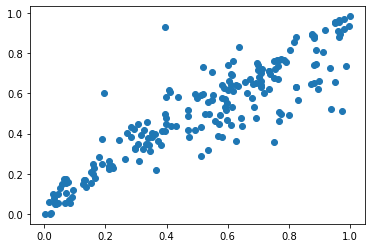

In [172]:
plt.scatter(y_test,p)

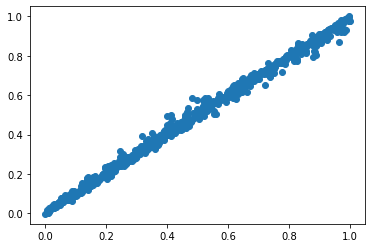

In [173]:
plt.scatter(y_train,q)

In [174]:
rmse_train = np.sqrt(mean_squared_error(y_train,q))
r2_train = r2_score(y_train, q)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, p))
r2_test = r2_score(y_test, p)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.01887285607003242
R2 score of training set is 0.9957063795430595


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.12723753619355688
R2 score of test set is 0.7978422697008163
